In [1]:
import os
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from figures.common_functions import format_panels, cst_from_fldr

In [2]:
fldr = 'cadd94_gmask_v1.6_without_bstat'
rst = cst_from_fldr(fldr)
pi0 = rst.stat.meanpi * rst.fixed.tau_init / rst.params[-1]

In [3]:
_, pi, pred = np.loadtxt('/Volumes/ghd017/Users/MURPHYD/Dropbox (OMRF)/final_files/cadd94_gmask_v1.6_without_bstat/basic_sort_n2000.txt').T
pi /= pi0
pred /= pi0
print('min 2000 bins = {}'.format(min(pi)))
print(sorted(pi)[:20])
_, pi, pred = np.loadtxt('/Volumes/ghd017/Users/MURPHYD/Dropbox (OMRF)/final_files/cadd94_gmask_v1.6_without_bstat/basic_sort_n100.txt').T
pi /= pi0
pred /= pi0
print('min 100 bins = {}'.format(min(pi)))

min 2000 bins = 0.3956752104266906
[0.3956752104266906, 0.4067873477865535, 0.4220415577008509, 0.44483901525593844, 0.44734449948052485, 0.4513162584452098, 0.4606173539290739, 0.4628623939661136, 0.46292032422791723, 0.467255813015301, 0.47026556426109734, 0.4755098995556897, 0.47850556539797845, 0.478596543298609, 0.47985714457146955, 0.48124245079764405, 0.4825377697631253, 0.48834482073235663, 0.4939567660968432, 0.49415254624074845]
min 100 bins = 0.5533077762057088


In [5]:
print('ok')

ok


In [40]:
def predicted_and_observed(cum_pos, ms, nt, scale):
    # create upper, lower indices to sort data into genomic windows
    windows = np.arange(0, cum_pos[-1], scale)
    jdx = np.searchsorted(cum_pos[ms], windows)
    idx = np.concatenate(([0], jdx[:-1]))
    # prepare empty lists for each relevant statisic
    obs = []
    for (i, j) in zip(idx, jdx):
        if j > i:
            # calculate average pi for the window
            pi = nt[i:j, 1].sum() / nt[i:j].sum()
            # record stats to lists
            obs.append(pi)
        else:
            obs.append(np.nan)
    # convert all results to arrays
    obs = np.array(obs)

    return windows, obs

cmpdir = '/Users/MURPHYD/Dropbox (OMRF)/final_files/compress'
increase = 0
get_edge = False
pos, pi, edges, mids = [], [], [], []
scale = 1e7
for c in range(1, 23):
    ch = 'chr{}'.format(c)
    nt = np.load(cmpdir+'/{}.cadd94_gmask_v1.6_without_bstat.BS1.6.CS0.0.mockYRI.narr.npz'.format(ch))['nt']
    sg = np.load(cmpdir+'/{}.cadd94_gmask_v1.6_without_bstat.BS1.6.CS0.0.sarr.npz'.format(ch))['sg']
    clen = int(np.sum(sg))
    mids.append(int(clen/2)+increase)
    ms = (np.sum(nt, axis=1)>0)
    print('binning data for {}'.format(ch))
    wins, obs = predicted_and_observed(np.cumsum(sg), ms, nt, scale)
    wins += increase
    pos.append(wins)
    pi.append(obs)
    if get_edge:
        get_edge = False
        edges.append((increase, increase+clen))
    else:
        get_edge = True
    increase += clen
    print('finished with {}'.format(ch))

pi = np.concatenate(pi)
pos = np.concatenate(pos)
pi /= np.nanmean(pi)
pi[pi>2] = np.nan
pi[pi==0] = np.nan

binning data for chr1
finished with chr1
binning data for chr2
finished with chr2
binning data for chr3
finished with chr3
binning data for chr4
finished with chr4
binning data for chr5
finished with chr5
binning data for chr6
finished with chr6


<ipython-input-40-ac18a0d6d487>:11: RuntimeWarning: invalid value encountered in double_scalars
  pi = nt[i:j, 1].sum() / nt[i:j].sum()


binning data for chr7
finished with chr7
binning data for chr8
finished with chr8
binning data for chr9
finished with chr9
binning data for chr10
finished with chr10
binning data for chr11
finished with chr11
binning data for chr12
finished with chr12
binning data for chr13
finished with chr13
binning data for chr14
finished with chr14
binning data for chr15
finished with chr15
binning data for chr16
finished with chr16
binning data for chr17
finished with chr17
binning data for chr18
finished with chr18
binning data for chr19
finished with chr19
binning data for chr20
finished with chr20
binning data for chr21
finished with chr21
binning data for chr22
finished with chr22


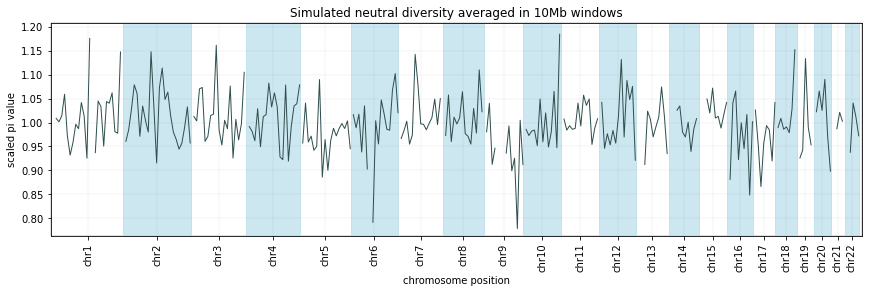

In [45]:
fig = plt.figure(figsize=(12, 4))
fig.patch.set_facecolor('white')
ax1 = plt.subplot(111)
format_panels(ax1)
plt.subplots_adjust(left=0.06, right=0.999, bottom=0.2, top=0.94)
plt.plot(pos, pi, 'darkslategray', lw=1)
plt.title('Simulated neutral diversity averaged in {}Mb windows'.format(int(scale/1e6)))
plt.ylabel('scaled pi value')
plt.xlabel('chromosome position')
ymax = np.nanmax(pi)*1.02
ymin = np.nanmin(pi)*0.98
plt.ylim(ymin, ymax)
plt.xlim(-1e7, increase+1e7)
for edge in edges:
    plt.fill_between(edge, ymin, ymax, color='lightblue', alpha=0.6)
plt.xticks(mids, ['chr{}'.format(c) for c in range(1, 23)], rotation=90)
fsave = '/Users/MURPHYD/Dropbox (OMRF)/final_files/mainfigs/neutral-coalescent-pi-values-{}Mb-windows.png'.format(int(scale/1e6))
plt.savefig(fsave, dpi=256)
plt.show()

In [26]:
10 ** -9.67

2.1379620895022325e-10